In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = "Standard Metropolitan Areas Data - train_data - data.csv"
df = pd.read_csv(filename)
df.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [3]:
df.shape

(99, 10)

In [4]:
df.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


In [5]:
import matplotlib.pyplot as plt

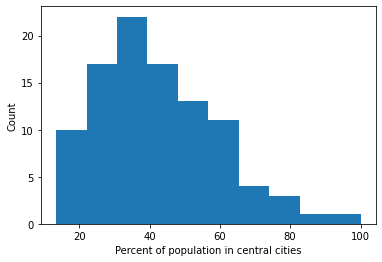

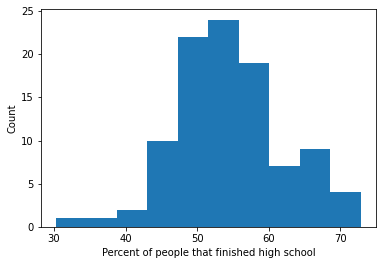

In [6]:
plt.hist(df['percent_city'])
plt.xlabel('Percent of population in central cities')
plt.ylabel('Count')
plt.show()
plt.hist(df['graduates'])
plt.xlabel('Percent of people that finished high school')
plt.ylabel('Count')
plt.show()

Most of the areas have 30-40% people in central cities and 50-60% graduates

In [7]:
print('Crime rate in North-East is', np.mean(df['crime_rate'][df['region']==1]))
print('Crime rate in North-Central is', np.mean(df['crime_rate'][df['region']==2]))
print('Crime rate in South is', np.mean(df['crime_rate'][df['region']==3]))
print('Crime rate in West is', np.mean(df['crime_rate'][df['region']==4]))

Crime rate in North-East is 41.95190476190477
Crime rate in North-Central is 53.9744
Crime rate in South is 58.26555555555555
Crime rate in West is 69.45588235294119


In [8]:
import seaborn as sns

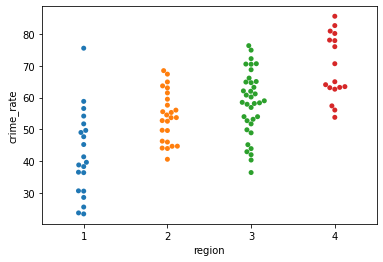

In [9]:
sns.swarmplot(x='region', y='crime_rate', data=df)
plt.show()

Crime rate is highest in West region and lowest in North-East region

In [10]:
df.dtypes

land_area           int64
percent_city      float64
percent_senior    float64
physicians          int64
hospital_beds       int64
graduates         float64
work_force        float64
income              int64
region              int64
crime_rate        float64
dtype: object

In [11]:
df.isnull().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

Let us consider high income = 1, low income = 0 and large land area = 1, small land area = 0 

In [12]:
df['income_range'] = df['income'].apply(lambda x: 2 if (x>50000) else (1 if (x>25000 and x<50000) else 0))
df['area_size'] = df['land_area'].apply(lambda x: 2 if (x>20000) else (1 if (x>10000 and x<20000) else 0))
df.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate,income_range,area_size
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55,2,0
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03,2,0
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32,1,0
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38,1,0
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19,1,0


In [13]:
x = df.drop(['land_area', 'income', 'crime_rate', 'physicians', 'hospital_beds'], axis=1)
y = df['crime_rate']

In [14]:
x.head()

,percent_city,percent_senior,graduates,work_force,region,income_range,area_size
0,78.1,12.3,50.1,4083.9,1,2,0
1,43.9,9.4,53.9,3305.9,2,2,0
2,37.4,10.7,50.6,2066.3,1,1,0
3,29.9,8.8,52.2,1966.7,2,1,0
4,31.5,10.5,66.1,1514.5,4,1,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [17]:
normal = preprocessing.StandardScaler().fit(x_train)
x_train = normal.transform(x_train)
x_test = normal.transform(x_test)

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1, max_depth=4)
dtr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [19]:
model = dtr.fit(x_train, y_train)
yhat = dtr.predict(x_test)
yhat[0:5]

array([49.69      , 53.53925926, 53.53925926, 81.835     , 38.915     ])

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test,yhat)

0.16522051439316698

In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [23]:
scores = cross_val_score(model, x, y, cv=8)
scores

array([-0.09380727, -0.59223233,  0.12693795, -0.39370105,  0.44394254,
        0.41939387,  0.57439796,  0.33850122])

In [24]:
yhat_pred = cross_val_predict(model, x, y, cv=8)
yhat_pred[0:5]

array([51.7       , 50.43545455, 56.55      , 70.06571429, 67.5425    ])

In [25]:
r2_score(y, yhat_pred)

0.24918882978922896